Tudo da vida segue uma distribuição gaussiana.
-V.C.A Marcelo

## Loading data

In [1]:
import pandas as pd
import numpy as np

df_gold = pd.read_csv('../data/d_kilo_gold_price_in_currency.csv')
df_gold['date'] = pd.to_datetime(df_gold['date'], infer_datetime_format=True)

data_x = np.array(df_gold['date'])
data_y = np.array(df_gold['America'])

data_table = pd.DataFrame()

## Forecasting with sktime

[source](https://www.sktime.org/en/latest/index.html)
[example1](https://towardsdatascience.com/sktime-a-unified-python-library-for-time-series-machine-learning-3c103c139a55)
[example2](https://github.com/alan-turing-institute/sktime/blob/master/examples/01_forecasting.ipynb)

In [2]:
import numpy as np
from math import sqrt
from sktime.performance_metrics.forecasting import *
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.utils import check_array

import pandas as pd

def RMSE(y_test, y_pred):
    return MSE(y_test, y_pred, squared=False)

# https://github.com/alan-turing-institute/sktime/blob/master/sktime/performance_metrics/forecasting/_functions.py
def print_metrics(title, y_pred, y_test, y_train):
    print(f'metrics for [{title}]:')
    # https://otexts.com/fpp2/accuracy.html#scale-dependent-errors
    print('    MAE', MAE(y_pred, y_test))
    print('    RMSE', RMSE(y_pred, y_test))
    # https://otexts.com/fpp2/accuracy.html#percentage-errors
    print('    MAPE', mape_loss(y_pred, y_test))
    print('    sMAPE', smape_loss(y_pred, y_test))
    # https://otexts.com/fpp2/accuracy.html#scaled-errors
    print('    MASE', mase_loss(y_pred, y_test, y_train))
    
    d = {'Modelo':[title],
         'MAE':[MAE(y_pred, y_test)],
         'RMSE':[RMSE(y_pred, y_test)],
         'MAPE':[mape_loss(y_pred, y_test)],
         'SMAPE':[smape_loss(y_pred, y_test)],
         'MASE':[mase_loss(y_pred, y_test, y_train)]        
    }
    df = pd.DataFrame(data=d)                   
    
    return df

Importing plotly failed. Interactive plots will not work.


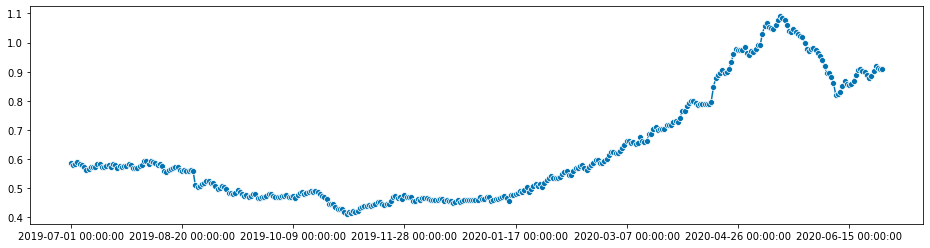

In [3]:
from sktime.forecasting.all import *
from sktime.forecasting.arima import ARIMA, AutoARIMA
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.theta import ThetaForecaster
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.forecasting.fbprophet import Prophet

# preparing data
y = pd.Series(data_y, index=data_x)
y.index.freq = 'd'
plot_series(y)

# defining the forecasting horizon
days_to_predict = 30
y_train, y_test = temporal_train_test_split(y, test_size=days_to_predict)
fh = ForecastingHorizon(y_test.index, is_relative=False)

In [4]:
# naive forecaster (last)
# https://www.sktime.org/en/latest/api_reference/modules/auto_generated/sktime.forecasting.naive.NaiveForecaster.html
forecaster = NaiveForecaster(strategy="last")
forecaster.fit(y_train)
y_pred_naive_last = forecaster.predict(fh)
data_table = data_table.append(print_metrics('naive_last', y_pred_naive_last, y_test, y_train))

metrics for [naive_last]:
    MAE 0.08726891286390422
    RMSE 0.09385387807404987
    MAPE 0.08944090298902914
    sMAPE 0.09434748135777878
    MASE 13.403727889061507


In [5]:
# naive forecaster (mean)
# https://www.sktime.org/en/latest/api_reference/modules/auto_generated/sktime.forecasting.naive.NaiveForecaster.html
forecaster = NaiveForecaster(strategy="mean")
forecaster.fit(y_train)
y_pred_naive_mean = forecaster.predict(fh)
data_table = data_table.append(print_metrics('naive_mean', y_pred_naive_mean, y_test, y_train))

metrics for [naive_mean]:
    MAE 0.2867866701800995
    RMSE 0.28885858386082297
    MAPE 0.4766587607657177
    sMAPE 0.38405161025215706
    MASE 44.047878713681406


In [6]:
# naive forecaster (drift)
# https://www.sktime.org/en/latest/api_reference/modules/auto_generated/sktime.forecasting.naive.NaiveForecaster.html
forecaster = NaiveForecaster(strategy="drift")
forecaster.fit(y_train)
y_pred_naive_drift = forecaster.predict(fh)
data_table = data_table.append(print_metrics('naive_drift', y_pred_naive_drift, y_test, y_train))

metrics for [naive_drift]:
    MAE 0.10533622063924182
    RMSE 0.11130543857321411
    MAPE 0.10590132440623228
    sMAPE 0.11258832500165901
    MASE 16.178705474564527


In [7]:
# arima forecaster
# https://www.sktime.org/en/latest/api_reference/modules/auto_generated/sktime.forecasting.arima.ARIMA.html
custom_method = { 1 : 'bfgs', 7 : 'bfgs', 30 : 'powell' }
forecaster = ARIMA(method=custom_method[days_to_predict])
forecaster.fit(y_train)
y_pred_arima = forecaster.predict(fh)
data_table = data_table.append(print_metrics('arima', y_pred_arima, y_test, y_train))

C:\Users\RubensCividatiTeles\.conda\envs\python37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


metrics for [arima]:
    MAE 0.07899785252776027
    RMSE 0.08633035145967788
    MAPE 0.08163587627520617
    sMAPE 0.08584212005697972
    MASE 12.133366674953411


In [8]:
# auto arima forecaster
# https://www.sktime.org/en/latest/api_reference/modules/auto_generated/sktime.forecasting.arima.AutoARIMA.html
custom_method = { 1 : 'nm', 7 : 'bfgs', 30 : 'cg' }
forecaster = AutoARIMA(method=custom_method[days_to_predict])
forecaster.fit(y_train)
y_pred_auto = forecaster.predict(fh)
data_table = data_table.append(print_metrics('auto', y_pred_auto, y_test, y_train))

C:\Users\RubensCividatiTeles\.conda\envs\python37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\RubensCividatiTeles\.conda\envs\python37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\RubensCividatiTeles\.conda\envs\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\RubensCividatiTeles\.conda\envs\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\RubensCividatiTeles\.conda\envs\py

metrics for [auto]:
    MAE 0.04375418800559451
    RMSE 0.05609769608146071
    MAPE 0.0470120227787985
    sMAPE 0.04869843087555472
    MASE 6.7202536480364525


C:\Users\RubensCividatiTeles\.conda\envs\python37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [9]:
# exponential smoothing forecaster
# https://www.sktime.org/en/latest/api_reference/modules/auto_generated/sktime.forecasting.exp_smoothing.ExponentialSmoothing.html
forecaster = ExponentialSmoothing()
forecaster.fit(y_train)
y_pred_expo = forecaster.predict(fh)
data_table = data_table.append(print_metrics('expo', y_pred_expo, y_test, y_train))

metrics for [expo]:
    MAE 0.08726891292671499
    RMSE 0.0938538781324537
    MAPE 0.0894409030476455
    sMAPE 0.09434748142198525
    MASE 13.403727898708683


In [10]:
# theta forecaster
# https://www.sktime.org/en/v0.4.2/modules/auto_generated/sktime.forecasting.theta.ThetaForecaster.html
forecaster = ThetaForecaster()
forecaster.fit(y_train)
y_pred_theta = forecaster.predict(fh)
data_table = data_table.append(print_metrics('theta', y_pred_theta, y_test, y_train))

metrics for [theta]:
    MAE 0.09770908499675936
    RMSE 0.10377399905463164
    MAPE 0.09905262048408672
    sMAPE 0.1049458501531713
    MASE 15.007245359274355


In [11]:
# polynomial trend forecaster
# https://www.sktime.org/en/v0.4.2/modules/auto_generated/sktime.forecasting.trend.PolynomialTrendForecaster.html
custom_degree = { 1 : 4, 7 : 4, 30 : 1 }
forecaster = PolynomialTrendForecaster(degree=custom_degree[days_to_predict])
forecaster.fit(y_train)
y_pred_poly = forecaster.predict(fh)
data_table = data_table.append(print_metrics('poly', y_pred_poly, y_test, y_train))

metrics for [poly]:
    MAE 0.05571648529206608
    RMSE 0.06602128828355178
    MAPE 0.06706074674216973
    sMAPE 0.06404889666443427
    MASE 8.557555987369737


In [12]:
# prophet forecaster
# https://www.sktime.org/en/latest/api_reference/modules/auto_generated/sktime.forecasting.fbprophet.Prophet.html
# forecaster = Prophet()
forecaster = Prophet(yearly_seasonality=True, daily_seasonality=True)
forecaster.fit(y_train)
y_pred_prophet = forecaster.predict(fh)
data_table = data_table.append(print_metrics('prophet', y_pred_prophet, y_test, y_train))

metrics for [prophet]:
    MAE 0.04333210953599991
    RMSE 0.05198782651156032
    MAPE 0.05179707760209825
    sMAPE 0.05006973072895325
    MASE 6.655426153701783


In [13]:
#!/usr/bin/env python3 -u
# -*- coding: utf-8 -*-
# copyright: sktime developers, BSD-3-Clause License (see LICENSE file)

__all__ = ["plot_series"]
__author__ = ["Markus Löning"]

import numpy as np

from sktime.utils.validation._dependencies import _check_soft_dependencies
from sktime.utils.validation.forecasting import check_y

def custom_plot_series(*series, labels=None):
    """Plot one or more time series

    Parameters
    ----------
    series : pd.Series
        One or more time series
    labels : list, optional (default=None)
        Names of series, will be displayed in figure legend

    Returns
    -------
    fig : plt.Figure
    ax : plt.Axis
    """
    _check_soft_dependencies("matplotlib", "seaborn")
    import matplotlib.pyplot as plt
    from matplotlib.ticker import FuncFormatter, MaxNLocator
    from matplotlib.cbook import flatten
    import seaborn as sns

    for y in series:
        check_y(y)

    n_series = len(series)

    # labels
    if labels is not None:
        if n_series != len(labels):
            raise ValueError(
                """There must be one label for each time series,
                but found inconsistent numbers of series and
                labels."""
            )
        legend = True
    else:
        labels = ["" for _ in range(n_series)]
        legend = False

    # create combined index
    index = series[0].index
    for y in series[1:]:
        # check types, note that isinstance() does not work here because index
        # types inherit from each other, hence we check for type equality
        if not type(index) is type(y.index):  # noqa
            raise TypeError("Found series with different index types.")
        index = index.union(y.index)

    # generate integer x-values
    xs = [np.argwhere(index.isin(y.index)).ravel() for y in series]

    # create figure
    fig, ax = plt.subplots(1, figsize=plt.figaspect(0.25))
    colors = sns.color_palette("colorblind", n_colors=n_series)

    # plot series
    for x, y, color, label in zip(xs, series, colors, labels):
        sns.lineplot(x=x, y=y, ax=ax, label=label, color=color)

    # combine data points for all series
    xs_flat = list(flatten(xs))

    # set x label of data point to the matching index
    def format_fn(tick_val, tick_pos):
        if int(tick_val) in xs_flat:
            date_arr = str(index[int(tick_val)])[:10].split('-')
            date_str = f'{date_arr[2]}/{date_arr[1]}/{date_arr[0][:2]}'
            return date_str
        else:
            return ""

    # dynamically set x label ticks and spacing from index labels
    ax.xaxis.set_major_formatter(FuncFormatter(format_fn))
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    ax.grid()
    ax.legend()
    
    fig.savefig(f'plot_{days_to_predict}_days.png')

    return fig, ax

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

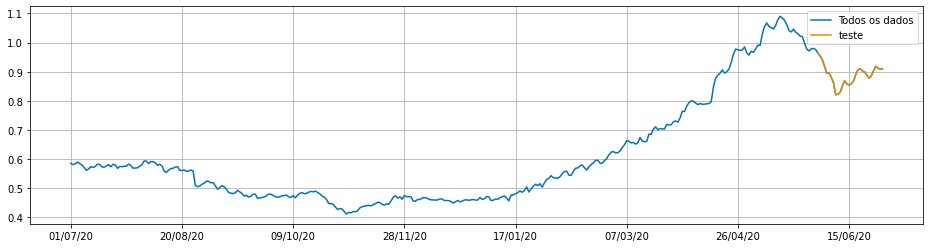

In [14]:
custom_plot_series(y[:], y_test, labels=["Todos os dados", "teste"])

In [15]:
len(y)

366

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

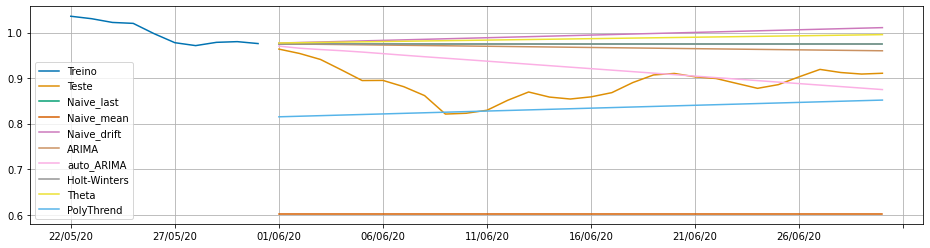

In [16]:
# plot all results
custom_plot_series(y_train[-10:], y_test, y_pred_naive_last, y_pred_naive_mean, y_pred_naive_drift, y_pred_arima, y_pred_auto, y_pred_expo, y_pred_theta, y_pred_poly, 
            labels=["Treino", "Teste", "Naive_last", "Naive_mean", "Naive_drift", "ARIMA", "auto_ARIMA", "Holt-Winters", "Theta", "PolyThrend"])

In [17]:
# metrics table
data_table

,Modelo,MAE,RMSE,MAPE,SMAPE,MASE
0,naive_last,0.087269,0.093854,0.089441,0.094347,13.403728
0,naive_mean,0.286787,0.288859,0.476659,0.384052,44.047879
0,naive_drift,0.105336,0.111305,0.105901,0.112588,16.178705
0,arima,0.078998,0.086330,0.081636,0.085842,12.133367
0,auto,0.043754,0.056098,0.047012,0.048698,6.720254
0,expo,0.087269,0.093854,0.089441,0.094347,13.403728
0,theta,0.097709,0.103774,0.099053,0.104946,15.007245
0,poly,0.055716,0.066021,0.067061,0.064049,8.557556
0,prophet,0.043332,0.051988,0.051797,0.050070,6.655426
